# Forecasting Bike Demand for a Bike sharing service - Part 2

Boston city has bike sharing facilities. We want to understand the nature of the demand.Our data set has columns like the date, time and demand during the time.

We saw from our Exploratory Data Analysis that there is a weekly pattern for the demand for bikes.In this section we will try to predict the last 3 days of the data based off of the first 21 days using time series.

In [153]:
# install packages

install.packages('forecast')
install.packages('ggplot2')
install.packages('ggthemes')
install.packages('ggfortify')

In [96]:
# call packages

library('forecast')
library('ggplot2')
library('ggthemes')
library('ggfortify')

In [97]:
# Read Data

bicup.df <- read.csv("C:/Users/Sandhya Ravindran/Desktop/r_wd/bicup2006.csv")

## Pre-Processing data 
Our data frame is factorized. Data has 24 levels, time column has 63 levels. lets create a new column for the day of week and factorize it with 7 levels.

In [98]:
# Lets start by creating a new column for the day of week and factorize it.

day.of.week <- rep(rep(c(1:7),each = 63),4)
bicup.df$DAY.OF.WEEK <- days[1:dim(bicup.df)[1]]
bicup.df$DAY.OF.WEEK <- as.factor(bicup.df$DAY.OF.WEEK)
levels(bicup.df$DAY.OF.WEEK)

[1] "1" "2" "3" "4" "5" "6" "7"

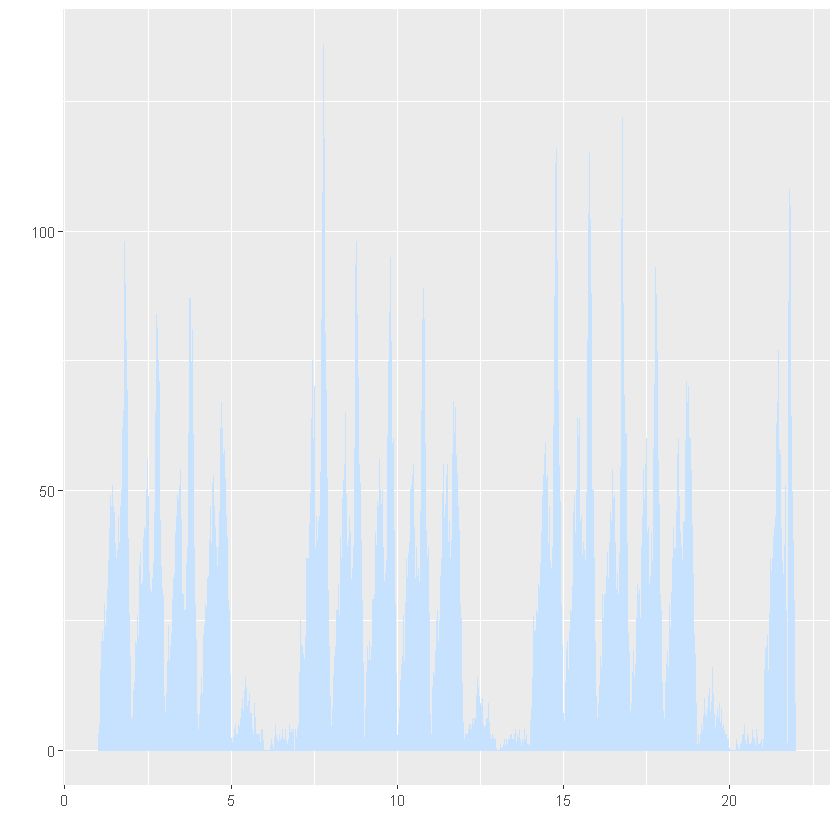

In [151]:
# Lets create our time series object and plot

bicup.ts <- ts(bicup.df$DEMAND, start =c(1,1), end = c(21,63), freq = 63)
#autoplot(bicup.ts,ts.colour = '#40e0d0', ts.linetype = 'dashed')
autoplot(bicup.ts,ts.geom = 'ribbon', fill= '#c6e2ff')

We can see that our weekly fluctuations are roughly constant in size over time. Lets partition our data into train and validation sets. Lets set aside 3 more days for validation and train on the remaining data. 

In [100]:
# Data Partition 

train.ts <- window(bicup.ts, start = c(2,1), end = c(18,63))
valid.ts <- window(bicup.ts, start = c(19,1), end = c(21,63))
train.df <- bicup.df[1:18*63,]
next3days.df <- bicup.df[(21*63+1):(24*63),]
head(train.df)
head(next3days.df)

,DATE,TIME,DEMAND,DAY.OF.WEEK
63,1-Mar-05,22:00,8,1
126,2-Mar-05,22:00,9,2
189,3-Mar-05,22:00,3,3
252,4-Mar-05,22:00,5,4
315,5-Mar-05,22:00,0,5
378,6-Mar-05,22:00,0,6


,DATE,TIME,DEMAND,DAY.OF.WEEK
1324,22-Mar-05,6:30,NA,1
1325,22-Mar-05,6:45,NA,1
1326,22-Mar-05,7:00,NA,1
1327,22-Mar-05,7:15,NA,1
1328,22-Mar-05,7:30,NA,1
1329,22-Mar-05,7:45,NA,1


In [152]:
# Fitting model

bicup.lm <- tslm(train.ts~trend, data = train.df)
bicup.lm.pred <- forecast(bicup.lm, h= 63*3, level=0,newdata = train.df$DAY.OF.WEEK)
accuracy(valid.ts,bicup.lm.pred$mean)

Warning message in forecast.lm(bicup.lm, h = 63 * 3, level = 0, newdata = train.df$DAY.OF.WEEK):
"newdata column names not specified, defaulting to first variable required."

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,29.27429,29.39339,29.27429,91.97861,91.97861,0.2277623,3690.937


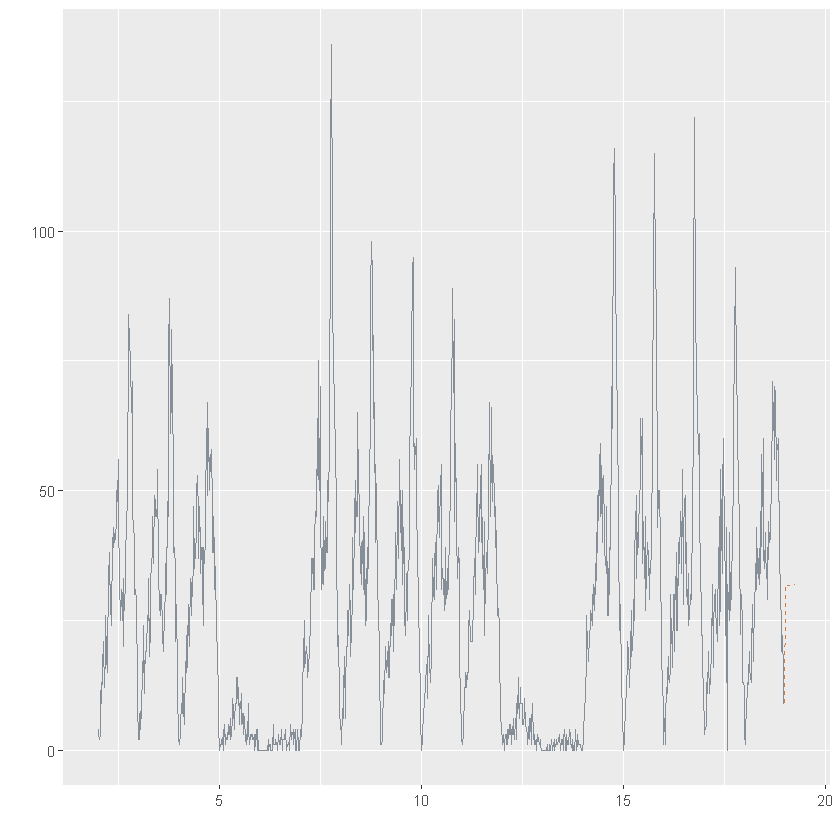

In [146]:
autoplot(bicup.lm.pred, ts.colour = '#868f98', predict.colour = '#d57946',
         predict.linetype = 'dashed', conf.int = FALSE)

In [147]:
bicup.lm.fulldata <- tslm(bicup.ts~trend, data = bicup.df[1:(21*63),])
bicup.lm.next3days <- forecast(bicup.lm.fulldata, h=63*3,level=0,newdata=next3days.df)

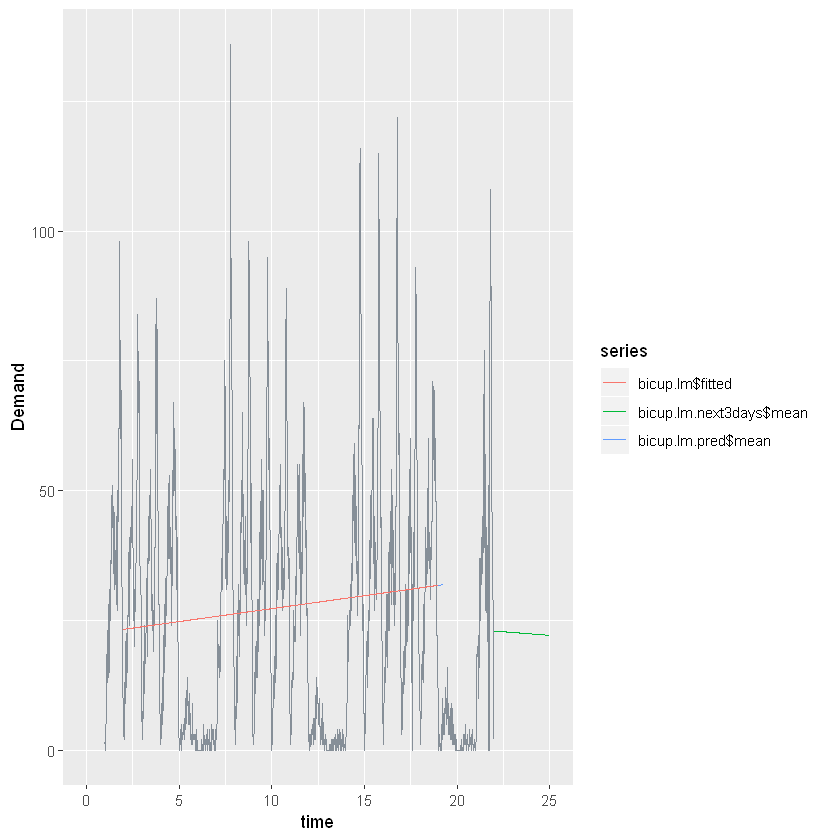

In [150]:
autoplot(bicup.ts, ts.colour = '#868f98', xlab="time",ylab = "Demand",xlim = c(0,25)) + autolayer(bicup.lm$fitted) +autolayer(bicup.lm.next3days$mean)+autolayer(bicup.lm.pred$mean)